# MNIST

Der __MNIST__-Datensatz (__Modified National Institute of Standards and Technology__) ist einer der bekanntesten und am häufigsten verwendeten Datensätze in der Machine-Learning- und Deep-Learning-Forschung, insbesondere für die Bildklassifikation. Der Datensatz besteht aus handgeschriebenen Ziffern und wird hauptsächlich zum Testen von Algorithmen zur Ziffernerkennung genutzt.

Der MNIST-Datensatz  hat eine bedeutende Rolle als Benchmark-Datensatz gespielt und bleibt ein beliebtes Lernwerkzeug für Anfänger in der Computer Vision.

Obwohl MNIST als Einstieg und Testdatensatz hervorragend geeignet ist, sind die Bilder relativ einfach (z. B. klar und einheitlich geschrieben), was bedeutet, dass viele moderne Deep-Learning-Modelle mit höheren Auflösungen und komplexeren Szenarien deutlich anspruchsvolleren Aufgaben gewidmet sind. Für komplexere Aufgaben werden oft Datensätze wie __CIFAR-10__ oder __ImageNet__ verwendet.

## Wichtige Merkmale des MNIST-Datensatzes:

* Typ: Handgeschriebene Ziffern von 0 bis 9
* Anzahl der Bilder: 70.000 Bilder 
* Bildgröße: 28×28 Pixel
* Farben: Graustufen (einzelner Kanal, keine Farbinformationen)
* Klassifikationsaufgabe: Jede Ziffer (0-9) ist als eine Klasse zu erkennen.
* Verwendung: Der Datensatz wird oft verwendet, um Modelle zur Ziffernerkennung zu trainieren und zu evaluieren.
* Datenstruktur:
    * Training Set: 60.000 Bilder, die für das Trainieren eines Modells verwendet werden.
    * Test Set: 10.000 Bilder, die zur Evaluierung des Modells verwendet werden.

## Ziel des Datensatzes:

Das Ziel des MNIST-Datensatzes ist es, Maschinen zu lehren, handgeschriebene Ziffern zu erkennen, was eine grundlegende Herausforderung der Bildklassifikation darstellt. Er hat sich als Standarddatensatz für erste Experimente und als Benchmark für neue Algorithmen etabliert.

## Verwendung im Deep Learning:

Der MNIST-Datensatz ist besonders für Anfänger geeignet, da die Bilder relativ einfach sind und in der Regel eine gute Grundlage für das Erlernen von Konzepten in der Bildklassifikation bieten. Besonders häufig kommen dabei Convolutional Neural Networks (CNNs) zum Einsatz.

### Einlesen (und ggf. einmaliger Download) des Datensatzes

Die Bibliothek `torchvision` stellt alle Funktionen zum Download des Datensatzes bereit. Die Daten werden als gzip-Datei in das Datenverzeichnis heruntergladen und entpackt.

In [1]:
import torchvision
import torchvision.transforms as transforms

# Transformation: Umwandlung in Tensor und Normalisierung
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Laden des Trainings- und Testsets
training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


### Die Bilddaten

PyTorch erwartet (farbige) Bilddaten als dreidimensionalen Tensor: Die drei Farbinformationen sind als drei übereinanderliegende Ebenen angeordnet. Normalerweise bestehen Bilddaten aus einem zweidiemnsionalen Array mit jeweils drei Farbwerten (RGB). Um zwischen diesen beiden Formaten zu wechseln, kann man die Methode permute verwenden, mit den die Dimensionen eines Tensors "vertauscht" werden. 

Auch im Fall von Grauwertbildern ist der Tensor dreidimensional. Allerdings ist statt der drei Farbdimensionen nur eine einzige (Grau-)Dimension vorhanden.

Wir zeigen beispielhaft die ersten Bilder des Datensatzes:

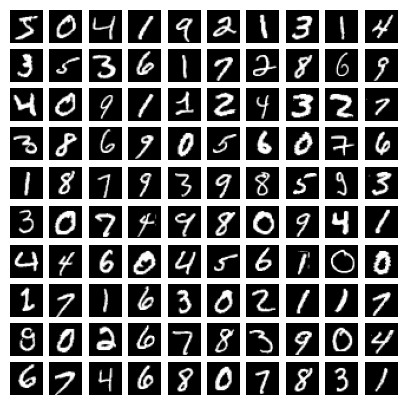

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 10, figsize=(5,5))

for n, ax in enumerate(axs.flat):
    image, label = training_data[n]
    ax.imshow(image.permute(1,2,0), cmap='grey')
    ax.axis('off')     

### Optional: Konvertierung der Daten in das YOLO-Format

 Nach dem Download befinden sich  die Trainings- und Testdaten sowie die dazugehörenden Labels im Binärformat im Datenverzeichnis `MNIST/raw`. Ein einfacher Zugiff ist über `training_data` und `test_data` möglich. Optional können die Daten aber auch in Bild- und Textdateien konvertiert werden:

In [ ]:
import numpy as np
from PIL import Image
import os
from torch.utils.data import ConcatDataset

def convert_data():  
    image_dir = f'./data/mnist/images'
    label_dir = f'./data/mnist/labels'
    os.makedirs(image_dir, exist_ok=True)
    os.makedirs(label_dir, exist_ok=True)     
    combined_dataset = ConcatDataset([training_data, test_data])

    print(f'Konvertiere {len(combined_dataset)} Datensätze')
    for n, (data, label) in enumerate(combined_dataset):
        data = 255. - 255. * data.squeeze(0).numpy()
        image = Image.fromarray(data).convert('RGB')
        fname = f'{n+1:05}-{label}'
        image.save(f'{image_dir}/{fname}.png')

        with open(f'{label_dir}/{fname}.txt','w') as f:
            f.write(f"{label} 0.5 0.5 1.0 1.0\n")   
    print(f'Konvertierung beendet')            

convert_data()        
 